<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE - TOEPASSING TRENDLIJN - DE POST</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook krijg je data voorgeschoteld van de Belgische postbedeling. <br>
    - Je bepaalt de mate van samenhang a.d.h.v. de correlatiecoëfficiënt.<br>
    - Je bepaalt de vergelijking van de regressielijn. <br>
    - Je stelt de gegeven data en de regressielijn duidelijk voor op een grafiek. 
</div>

### Opdracht
Het aantal brieven dat jaarlijks in Belgie wordt verstuurd kent een dalende trend. Het aantal pakjes dat verstuurd wordt boomt. Je beschikt voor deze notebook over een csv-file die cijfers hierover bevat voor de periode 2004-2017. <br>
Je vindt het bestand in de map `data`: `post.csv`.

- Lees de data in. 

Vervolgens bepaal je:
- de mate van samenhang tussen het jaartal en het aantal brieven;
- de mate van samenhang tussen het jaartal en het aantal pakjes;
- de vergelijkingen van de regressielijnen voor de brieven en voor de pakjes, telkens in functie van het jaartal. <br>

Tot slot stel je de gegeven data en de regressielijnen duidelijk voor op een grafiek.

### Extra opdracht
Bekijk nu de inkomsten bij Bpost door de brieven en de pakjes. De eenheid van de inkomsen is dezelfde dus je kan beide op eenzelfde grafiek visualiseren. aantal brieven dat jaarlijks in Belgie wordt verstuurd kent een dalende trend. Het aantal pakjes dat verstuurd wordt boomt. De data staan in hetzelfde bestand als van de eerste opdracht. 

Vervolgens bepaal je:
- de mate van samenhang tussen het jaartal en de inkomsten van de brieven;
- de mate van samenhang tussen het jaartal en de inkomste van de pakjes;
- de vergelijkingen van de regressielijnen voor de brieven en voor de pakjes, telkens in functie van het jaartal. <br>

Tot slot stel je de gegeven data en de regressielijnen duidelijk voor op een en dezelfde grafiek.

### Nog een extra opdracht
Bekijk de samenhang tussen de inkomsten van de brieven in functie van de inkomsten van de pakjes. 
Stel ook hiervoor een regressielijn op en visualiseer. 

# Voorbeeldoplossing

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data inlezen en visualiseren</h2> 
    </font>
</div>

In [2]:
# voorbeeldscript
post = pd.read_csv("data/post.csv")
post

,jaar,aantal brieven per dag (in miljoen),aantal pakjes per dag,inkomsten brieven (in miljoen euro),inkomsten pakjes (in miljoen euro)
0,2004,14.4,NaN,NaN,NaN
1,2010,12.0,90000.0,954.4,120.8
2,2011,12.0,100000.0,967.2,154.1
3,2012,10.5,100000.0,928.7,165.0
4,2013,10.0,105000.0,961.3,249.6
5,2014,9.6,112000.0,943.2,307.2
6,2015,9.1,126000.0,917.6,340.7
7,2016,8.6,NaN,873.3,379.4
8,2017,8.1,190000.0,807.9,796.1


In [3]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
x = post["jaar"]
y = post["aantal brieven per dag (in miljoen)"]
z = post["aantal pakjes per dag"]

x = np.array(x)
y = np.array(y)
z = np.array(z)

In [4]:
# bij pakjes jaar 2004 en jaar 2016 weghalen want daarvan ontbreekt het aantal
# zowel jaartal als overeenkomst 'aantal' (NaN - not a number) weghalen
index1 = np.where(x == 2004)
index2 = np.where(x == 2016)
print(index1, index2)

(array([0], dtype=int64),) (array([7], dtype=int64),)


In [5]:
x_opgekuist = np.delete(x, [0, 7])  # elementen met index 0 en met index 7 verwijderd uit NumPy array
print(x_opgekuist)
z_opgekuist = np.delete(z, [0, 7])
print(z_opgekuist)

[2010 2011 2012 2013 2014 2015 2017]
[ 90000. 100000. 100000. 105000. 112000. 126000. 190000.]


In [6]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
z_min = z_opgekuist.min()
z_max = z_opgekuist.max()
print(x_min, x_max, y_min, y_max, z_min, z_max)

2004 2017 8.1 14.4 90000.0 190000.0


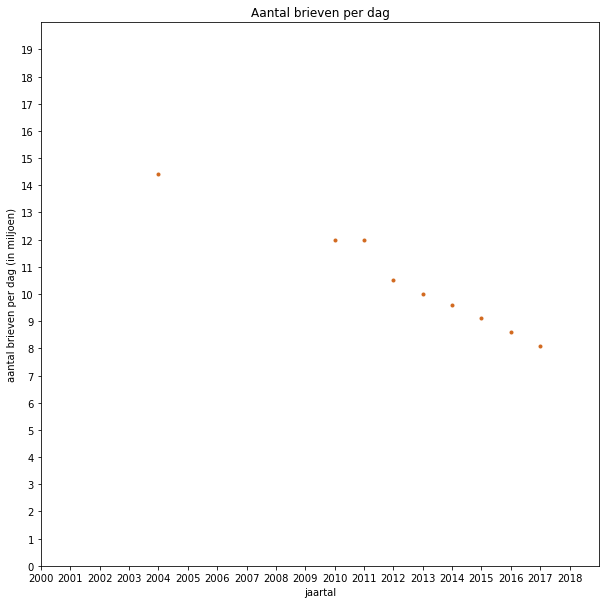

In [7]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2000, xmax=2019, ymin=0, ymax=20)        # vensterinstellingen  
plt.xticks(np.arange(2000, 2019, step=1))
plt.yticks(np.arange(0, 20, step=1))
plt.title("Aantal brieven per dag")
plt.xlabel("jaartal")
plt.ylabel("aantal brieven per dag (in miljoen)")
plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

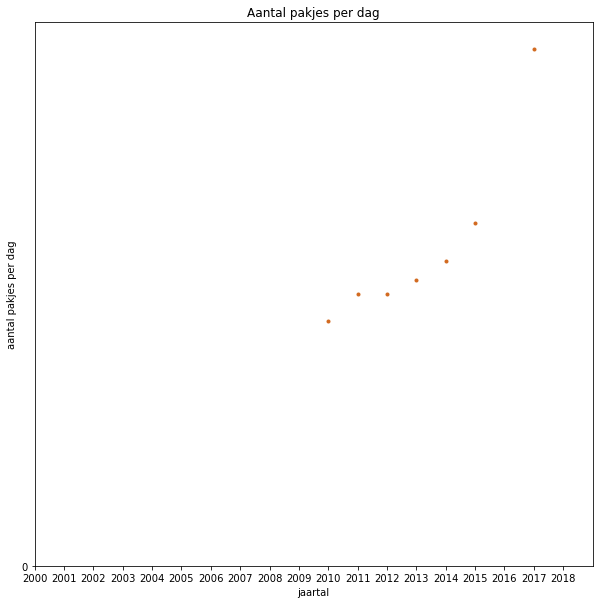

In [8]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2000, xmax=2019, ymin=0, ymax=200000)        # vensterinstellingen  
plt.xticks(np.arange(2000, 2019, step=1))
plt.yticks(np.arange(0, 20, step=10000))
plt.title("Aantal pakjes per dag")
plt.xlabel("jaartal")
plt.ylabel("aantal pakjes per dag")
plt.scatter(x_opgekuist, z_opgekuist, color="chocolate", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

Je kan de correlatiecoëfficiënt bepalen met de functie `corrcoef()` uit de module NumPy. Deze functie geeft eigenlijk een tabel terug met 2 rijen en 2 kolommen, waarvan de correlatiecoëfficiënt te vinden is op de eerste rij in de tweede kolom.  

In [9]:
#voorbeeldscript
print("Correlatiecoëfficiënt R_brieven =", np.corrcoef(x, y)[0,1])     
print("Correlatiecoëfficiënt R_pakjes =", np.corrcoef(x_opgekuist, z_opgekuist)[0,1]) 

Correlatiecoëfficiënt R_brieven = -0.9852939801276944
Correlatiecoëfficiënt R_pakjes = 0.890955192524787


Dit wijst op een *negatieve zeer sterke lineaire samenhang* voor de brieven en een *positieve sterke lineaire samenhang* voor de pakjes. 

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [10]:
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en 'onthouden'
def linreg(rechte, x, y):
    """Rechte best passend bij datapunten x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit kijkt in def rechte hoe functievoorschrift eruit ziet
    # curve_fit geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return rechte(x, a, b)                          # geeft f(x) terug van regressielijn f

In [11]:
# regressielijn zoeken voor de brieven
y_regressielijn = linreg(rechte, x, y)                # y_regressielijn verwijst naar f(x) van regressielijn f

y =  -0.5049091157026435 x + 1026.57932262292


In [12]:
# regressielijn zoeken voor de pakjes
z_regressielijn = linreg(rechte, x_opgekuist, z_opgekuist) 

y =  12520.500294806798 x + -25087984.307773978


<div>
    <font color=#690027 markdown="1">  
        <h2>4. Grafiek</h2> 
    </font>
</div>

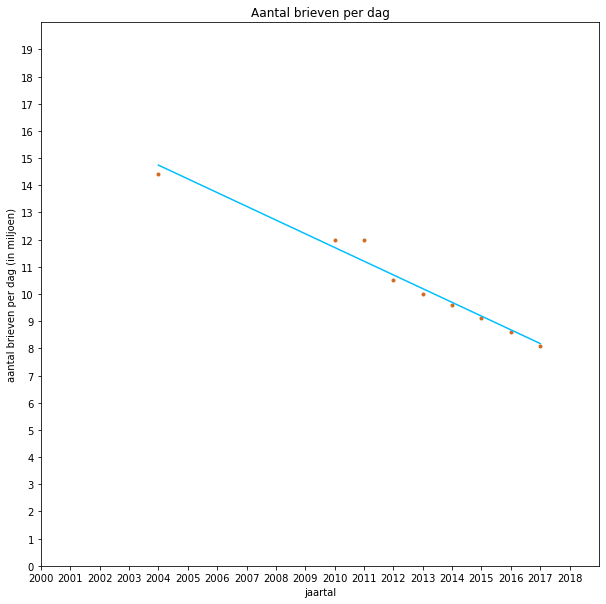

In [13]:
# voorbeeldscript
# grafiek puntenwolk samen met regressielijn
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2000, xmax=2019, ymin=0, ymax=20)        # vensterinstellingen
# plt.axis("equal")  
plt.xticks(np.arange(2000, 2019, step=1))
plt.yticks(np.arange(0, 20, step=1))
plt.title("Aantal brieven per dag")
plt.xlabel("jaartal")
plt.ylabel("aantal brieven per dag (in miljoen)")

plt.scatter(x, y, color="chocolate", marker=".")    # plot puntenwolk     

plt.plot(x, y_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

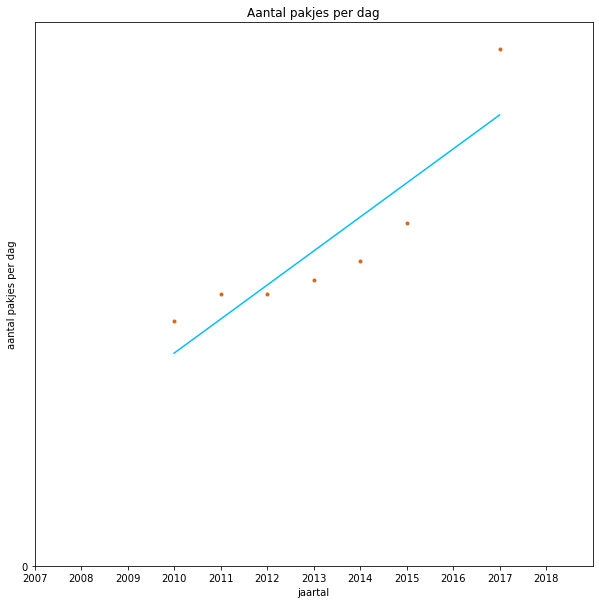

In [14]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2007, xmax=2019, ymin=0, ymax=200000)        # vensterinstellingen  
plt.xticks(np.arange(2007, 2019, step=1))
plt.yticks(np.arange(0, 20, step=10000))
plt.title("Aantal pakjes per dag")
plt.xlabel("jaartal")
plt.ylabel("aantal pakjes per dag")

plt.scatter(x_opgekuist, z_opgekuist, color="chocolate", marker=".")    # plot puntenwolk
plt.plot(x_opgekuist, z_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

### Voorbeeldoplossingen Extra opdrachten

In [15]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
u = post["inkomsten brieven (in miljoen euro)"]
v = post["inkomsten pakjes (in miljoen euro)"]

u = np.array(u)
v = np.array(v)

In [16]:
u_opgekuist = np.delete(u, 0)
v_opgekuist = np.delete(v, 0)
x2_opgekuist = np.delete(x, 0)
print(u_opgekuist)
print(v_opgekuist)
print(x2_opgekuist)

[954.4 967.2 928.7 961.3 943.2 917.6 873.3 807.9]
[120.8 154.1 165.  249.6 307.2 340.7 379.4 796.1]
[2010 2011 2012 2013 2014 2015 2016 2017]


In [17]:
u_min = u_opgekuist.min()
u_max = u_opgekuist.max()
v_min = v_opgekuist.min()
v_max = v_opgekuist.max()
print(u_min, u_max, v_min, v_max)

807.9 967.2 120.8 796.1


In [18]:
print("Correlatiecoëfficiënt R_inkomstenbrieven =", np.corrcoef(x2_opgekuist, u_opgekuist)[0,1])     
print("Correlatiecoëfficiënt R_inkomstenpakjes =", np.corrcoef(x2_opgekuist, v_opgekuist)[0,1])     

Correlatiecoëfficiënt R_inkomstenbrieven = -0.8337106935511075
Correlatiecoëfficiënt R_inkomstenpakjes = 0.8690455240101909


In [19]:
print("Correlatiecoëfficiënt R_pakjesbrieven =", np.corrcoef(u_opgekuist, v_opgekuist)[0,1])     

Correlatiecoëfficiënt R_pakjesbrieven = -0.9226510688965766


In [20]:
# regressielijnen
u_regressielijn = linreg(rechte, x2_opgekuist, u_opgekuist) 
v_regressielijn = linreg(rechte, x2_opgekuist, v_opgekuist) 

y =  -18.409523809566373 x + 37986.7761905595
y =  76.64642857159394 x + -154013.47142890815


In [24]:
# regressielijn
uv_regressielijn = linreg(rechte, v_opgekuist, u_opgekuist) 

y =  -0.23100175371854947 x + 991.7605383409306


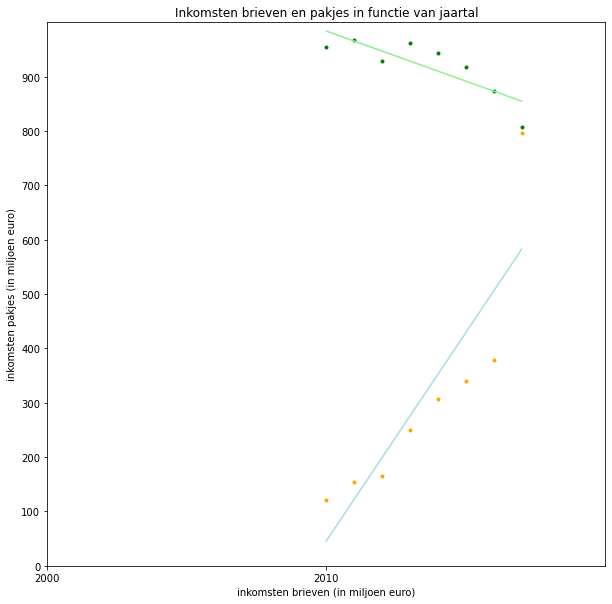

In [22]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2000, xmax=2020, ymin=0, ymax=1000)        # vensterinstellingen  
plt.xticks(np.arange(2000, 2020, step=10))
plt.yticks(np.arange(0, 1000, step=100))
plt.title("Inkomsten brieven en pakjes in functie van jaartal")
plt.xlabel("inkomsten brieven (in miljoen euro)")
plt.ylabel("inkomsten pakjes (in miljoen euro)")

plt.scatter(x2_opgekuist, u_opgekuist, color="green", marker=".")    # plot puntenwolk
plt.scatter(x2_opgekuist, v_opgekuist, color="orange", marker=".")    # plot puntenwolk
plt.plot(x2_opgekuist, u_regressielijn, color="lightgreen")   # plot regressielijn
plt.plot(x2_opgekuist, v_regressielijn, color="lightblue")   # plot regressielijn

plt.show()                                          # toon grafiek

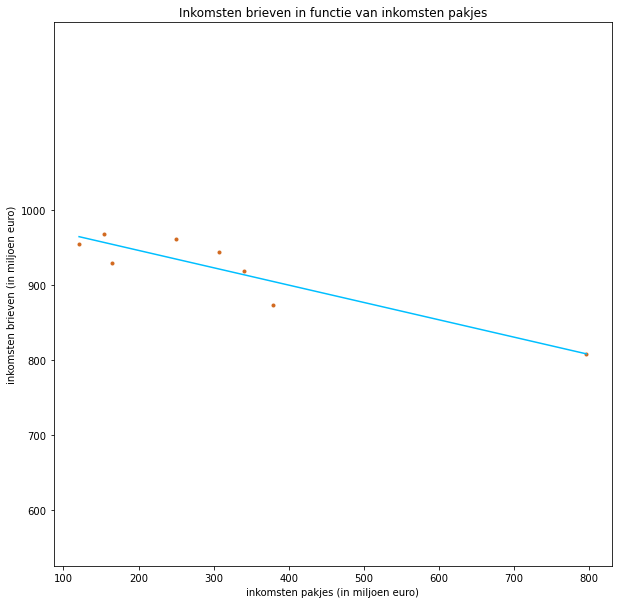

In [25]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=0, xmax=1000, ymin=0, ymax=1000)        # vensterinstellingen  
plt.axis("equal")
plt.xticks(np.arange(0, 1001, step=100))
plt.yticks(np.arange(0, 1001, step=100))
plt.title("Inkomsten brieven in functie van inkomsten pakjes")
plt.xlabel("inkomsten pakjes (in miljoen euro)")
plt.ylabel("inkomsten brieven (in miljoen euro)")

plt.scatter(v_opgekuist, u_opgekuist, color="chocolate", marker=".")    # plot puntenwolk
plt.plot(v_opgekuist, uv_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Grommen, S. (20 augustus 2018). Waatom Bpost de postbedeling wil omgooien: de tanende brievenpost in cijfers. <br> &nbsp; &nbsp; &nbsp; &nbsp;https://www.vrt.be/vrtnws/nl/2018/08/20/de-tanende-brievenpost-en-boomende-pakjespost-in-cijfers/

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels, B. Van de Velde & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 